<a href="https://colab.research.google.com/github/jafetimbre/verbose-projects/blob/master/artificial-intelligence/ann/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
cols = [ "Date", "Close" ]
tsla_data = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/statistics/stock-price-pred/res/tsla_2yr_data.csv", usecols=cols)
tsla_data.head()

,Date,Close
0,2019-11-25,67.267998
1,2019-11-26,65.783997
2,2019-11-27,66.258003
3,2019-11-29,65.987999
4,2019-12-02,66.973999


In [20]:
tsla_data.describe()

,Close
count,505.000000
mean,487.129175
std,288.413294
min,65.783997
25%,176.591995
50%,555.380005
75%,701.809998
max,1229.910034


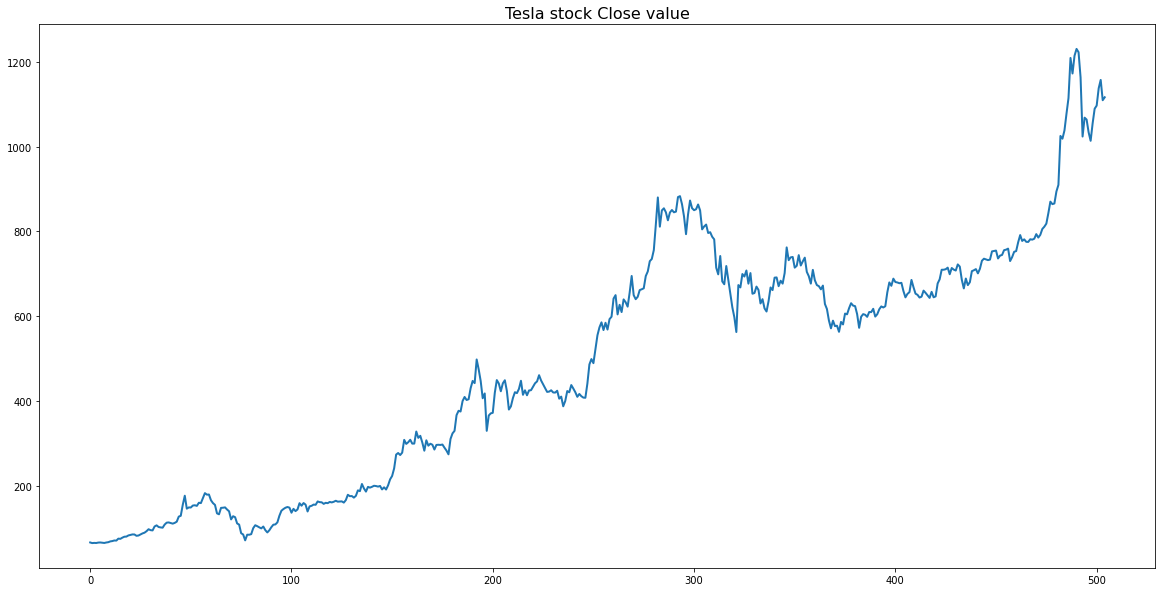

In [7]:
"plt.figure(figsize=(20,10))
plt.title('Tesla stock Close value', size=16)
plt.plot(tsla_data.Close, linewidth=2)
plt.show()

In [13]:
max = tsla_data.Close.max()
data = pd.DataFrame({'val': tsla_data.Close / max})
data.describe()

,val
count,505.000000
mean,0.396069
std,0.234500
min,0.053487
25%,0.143581
50%,0.451561
75%,0.570619
max,1.000000


In [21]:
data

,val
0,0.054693
1,0.053487
2,0.053872
3,0.053653
4,0.054454
...,...
500,0.891431
501,0.924507
502,0.940614
503,0.901716


In [74]:
def sigmoid(x, dx=False):
    return 1.0 / (1.0 + np.exp(-x)) if not dx else sigmoid(x) * (1.0 - sigmoid(x))

In [28]:
a = np.array([1,2,3])
ActivationFunctions.sigmoid(a)

array([0.73105858, 0.88079708, 0.95257413])

In [152]:
class Layer():
    def __init__(self, idx, dim, act_func=sigmoid, is_output=False):
        self.idx = idx
        self.weights = 2 * np.random.random(dim) - 1
        self.is_output = is_output
        self.act_func = act_func
        # Valorile de iesire din neuroni 
        self.A = None
        # Valorile de iesire prin funtia de activare derivata (pt eroare)
        self.dZ = None
        self.delta = None
    
    def feed_forward(self, x):
        z = np.dot(x, self.weights)
        self.A = self.act_func(z)
        self.dZ = np.atleast_2d(self.act_func(z, dx=True))
        return self.A

    
    def back_propagation(self, target, next_layer):
        if self.is_output:
            error = self.A - target
            self.delta = np.atleast_2d(error * self.dZ)
        else:
            self.delta = np.atleast_2d(np.dot(next_layer.delta, next_layer.weights.T) * self.dZ)
        return self.delta

    def update_weights(self, learning_rate, prev_val):
        val = np.atleast_2d(prev_val)
        delt = np.atleast_2d(self.delta)
        change = val.T.dot(delt)
        self.weights -= learning_rate * change


In [170]:
class Network():
    def __init__(self, layers_dim, activation_function):
        self.data_entr_in = layers_dim[0]
        self.data_entr_out = layers_dim[-1]
        self.layers = []
        for i in range(1, len(layers_dim)):
            new_layer_dim = (layers_dim[i-1], layers_dim[i])
            is_output_layer = i == len(layers_dim)-1
            
            self.layers.append(Layer(i, new_layer_dim, act_func=activation_function, is_output=is_output_layer))

    
    def fit(self, train_data, learning_rate=.2, iters=100):
        errors = []
        for iter_i in range(iters):
            iter_error = 0

            for dat_i in range(len(train_data) - self.data_entr_in):
                data_slice_x = train_data[dat_i:dat_i + self.data_entr_in]
                data_slice_y = train_data[dat_i + self.data_entr_in]
                
                step_val = data_slice_x
                for layer in self.layers:
                    step_val = layer.feed_forward(step_val)

                iter_error += np.average(self.layers[-1].A - data_slice_y)

                delta = self.layers[-1].back_propagation(data_slice_y, None)
                for layer_i in range(len(self.layers)-2, -1, -1):
                    delta = self.layers[layer_i].back_propagation(delta, self.layers[layer_i+1])

                step_val = data_slice_x
                for layer in self.layers:
                    layer.update_weights(learning_rate, step_val)
                    step_val = layer.A

            errors.append(iter_error / dat_i)

        return errors
        
    
    def forecast(self, x):
        step_val = np.array(x)
        for layer in self.layers:
            step_val = layer.feed_forward(step_val)
        return step_val


In [145]:
a = list(data.val)[:20]
a

[0.05469342949670699,
 0.053486836235064276,
 0.0538722356867796,
 0.053652703960915586,
 0.05445438866437667,
 0.05467066370315172,
 0.05415518286428272,
 0.05372262658351914,
 0.054620256390227995,
 0.05521216702266495,
 0.056726098497303784,
 0.05735378926522489,
 0.05848882845911283,
 0.05827906059130222,
 0.0620370603794997,
 0.0616288951342291,
 0.06393150317361365,
 0.06570236554832487,
 0.06595441451937055,
 0.06817084131356073]

In [172]:
n = Network([5, 10, 2], activation_function=sigmoid)
err = n.fit(a, iters=100)

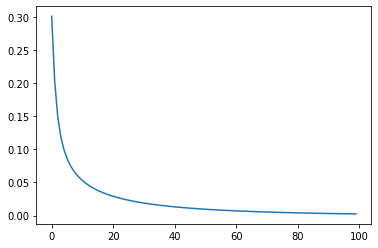

In [173]:
plt.plot(err)

In [156]:
n.forecast([0.05469342949670699,
 0.053486836235064276,
 0.0538722356867796,
 0.053652703960915586,
 0.05445438866437667])

array([0.05924872])

In [105]:
s = [1,2,3,4,5,6,7]

In [106]:
s[-2::-1]

[6, 5, 4, 3, 2, 1]